In [1]:
import pandas as pd
from datetime import datetime
import itertools
import numpy as np
from io import StringIO
import math
import scipy.stats.stats as stats
import matplotlib.pyplot as plt 
import pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import LeaveOneGroupOut
from sklearn import metrics, svm, neighbors, linear_model, tree
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.read_csv("Analysis-NoTimeShift-Activity-Sorted.csv")


In [3]:
df.head()


,Unnamed: 0,subject,activity,raw acc data,x,y,z,magnitude,running x,running y,...,z fft bin 9,x noise min,y noise min,z noise min,x noise max,y noise max,z noise max,x noise std,y noise std,z noise std
0,0,114,201,"[[0.07400000000000001, -0.89500000000000002, 0...","[0.07400000000000001, 0.070000000000000007, 0....","[-0.89500000000000002, -0.88300000000000001, -...","[0.43799999999999994, 0.41799999999999998, 0.4...","[0.9991721573382637, 0.9794452511498537, 0.984...",[ 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0....,[-0.45 -0.49 -0.54 -0.58 -0.63 -0.67 -0.72 -0....,...,0.263667,-0.10830,-0.47810,-0.10490,0.14910,0.07475,0.24555,0.061450,0.140260,0.067425
1,1,114,201,"[[-0.039, -1.1599999999999999, 0.5939999999999...","[-0.039, 0.0080000000000000002, -0.20300000000...","[-1.1599999999999999, -0.97999999999999998, -0...","[0.59399999999999997, 0.83999999999999997, 0.7...","[1.3038239911889948, 1.2907610158352318, 1.161...",[-0.02 -0.02 0.01 0.01 0.01 0.01 0.02 0....,[-0.37 -0.42 -0.49 -0.55 -0.58 -0.62 -0.66 -0....,...,0.351000,-0.39195,-0.78700,-0.37135,0.69425,0.40145,0.80150,0.188313,0.282239,0.264855
2,2,114,301,"[[0.223, -0.66400000000000003, 0.9020000000000...","[0.223, 0.24199999999999999, 0.233999999999999...","[-0.66400000000000003, -0.71499999999999997, -...","[0.90200000000000002, 0.80099999999999993, 0.7...","[1.1420284584895422, 1.1006316368340499, 1.116...",[ 0.1 0.11 0.12 0.13 0.14 0.16 0.17 0....,[-0.43 -0.47 -0.52 -0.57 -0.62 -0.67 -0.71 -0....,...,0.425833,-0.21085,-0.37080,-0.19250,0.15555,0.14615,0.61410,0.074228,0.119320,0.147130
3,3,114,101,"[[0.24600000000000002, -0.78900000000000003, 0...","[0.24600000000000002, 0.125, 0.354999999999999...","[-0.78900000000000003, -0.77000000000000002, -...","[0.54299999999999993, 0.621, 0.645000000000000...","[0.9888811859874774, 0.9970787330998491, 1.140...",[ 0.12 0.13 0.14 0.15 0.16 0.15 0.14 0....,[-0.42 -0.46 -0.5 -0.55 -0.59 -0.63 -0.67 -0....,...,0.545500,-0.27475,-0.40325,-0.18435,0.24025,0.50990,0.38295,0.100871,0.148942,0.130371
4,4,114,101,"[[0.17600000000000002, -0.85499999999999998, 0...","[0.17600000000000002, 0.17600000000000002, 0.1...","[-0.85499999999999998, -0.86699999999999999, -...","[0.45299999999999996, 0.44500000000000001, 0.4...","[0.983468352312366, 0.9902979349670482, 0.9657...",[ 0.08 0.09 0.09 0.11 0.13 0.13 0.13 0....,[-0.43 -0.48 -0.52 -0.57 -0.62 -0.67 -0.71 -0....,...,0.468167,-0.33510,-0.56955,-0.16830,0.25245,0.18820,0.36680,0.107441,0.150660,0.115344


In [4]:
df=df.rename(columns = {'0':'subject', '1':'activity', '2':'raw acc data'})


In [5]:
df.head()

,Unnamed: 0,subject,activity,raw acc data,x,y,z,magnitude,running x,running y,...,z fft bin 9,x noise min,y noise min,z noise min,x noise max,y noise max,z noise max,x noise std,y noise std,z noise std
0,0,114,201,"[[0.07400000000000001, -0.89500000000000002, 0...","[0.07400000000000001, 0.070000000000000007, 0....","[-0.89500000000000002, -0.88300000000000001, -...","[0.43799999999999994, 0.41799999999999998, 0.4...","[0.9991721573382637, 0.9794452511498537, 0.984...",[ 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0....,[-0.45 -0.49 -0.54 -0.58 -0.63 -0.67 -0.72 -0....,...,0.263667,-0.10830,-0.47810,-0.10490,0.14910,0.07475,0.24555,0.061450,0.140260,0.067425
1,1,114,201,"[[-0.039, -1.1599999999999999, 0.5939999999999...","[-0.039, 0.0080000000000000002, -0.20300000000...","[-1.1599999999999999, -0.97999999999999998, -0...","[0.59399999999999997, 0.83999999999999997, 0.7...","[1.3038239911889948, 1.2907610158352318, 1.161...",[-0.02 -0.02 0.01 0.01 0.01 0.01 0.02 0....,[-0.37 -0.42 -0.49 -0.55 -0.58 -0.62 -0.66 -0....,...,0.351000,-0.39195,-0.78700,-0.37135,0.69425,0.40145,0.80150,0.188313,0.282239,0.264855
2,2,114,301,"[[0.223, -0.66400000000000003, 0.9020000000000...","[0.223, 0.24199999999999999, 0.233999999999999...","[-0.66400000000000003, -0.71499999999999997, -...","[0.90200000000000002, 0.80099999999999993, 0.7...","[1.1420284584895422, 1.1006316368340499, 1.116...",[ 0.1 0.11 0.12 0.13 0.14 0.16 0.17 0....,[-0.43 -0.47 -0.52 -0.57 -0.62 -0.67 -0.71 -0....,...,0.425833,-0.21085,-0.37080,-0.19250,0.15555,0.14615,0.61410,0.074228,0.119320,0.147130
3,3,114,101,"[[0.24600000000000002, -0.78900000000000003, 0...","[0.24600000000000002, 0.125, 0.354999999999999...","[-0.78900000000000003, -0.77000000000000002, -...","[0.54299999999999993, 0.621, 0.645000000000000...","[0.9888811859874774, 0.9970787330998491, 1.140...",[ 0.12 0.13 0.14 0.15 0.16 0.15 0.14 0....,[-0.42 -0.46 -0.5 -0.55 -0.59 -0.63 -0.67 -0....,...,0.545500,-0.27475,-0.40325,-0.18435,0.24025,0.50990,0.38295,0.100871,0.148942,0.130371
4,4,114,101,"[[0.17600000000000002, -0.85499999999999998, 0...","[0.17600000000000002, 0.17600000000000002, 0.1...","[-0.85499999999999998, -0.86699999999999999, -...","[0.45299999999999996, 0.44500000000000001, 0.4...","[0.983468352312366, 0.9902979349670482, 0.9657...",[ 0.08 0.09 0.09 0.11 0.13 0.13 0.13 0....,[-0.43 -0.48 -0.52 -0.57 -0.62 -0.67 -0.71 -0....,...,0.468167,-0.33510,-0.56955,-0.16830,0.25245,0.18820,0.36680,0.107441,0.150660,0.115344


In [6]:
df.subject.unique()

array([ 114.,  122.,  115.,  104.,  111.,  107.,  112.,  102.,  118.,
        110.,  103.,  105.,  109.,  117.,  108.,  113.,  120.,  101.,
        123.,  106.,  124.,  119.,  116.,  121.])

In [7]:
Y = df['activity']

In [8]:
features = ['max', 'min', 'std', 'skew', 'kurtosis', 'mean', 'median', 'x max', 'y max', 'z max', 'x min', 'y min', 'z min', 'x mean', 'y mean', 'z mean', 'x median', 'y median', 'z median', 'x skew', 'y skew', 'z skew', 'x kurtosis', 'y kurtosis', 'z kurtosis', 'x std', 'y std', 'z std', 'xy mean', 'yz mean', 'xz mean','x fft min', 'y fft min', 'z fft min', 'x fft max', 'y fft max', 'z fft max', 'x fft std', 'y fft std', 'z fft std', 'x fft mean', 'y fft mean', 'z fft mean', 'x fft median', 'y fft median', 'z fft median', 'x fft mean weighted', 'y fft mean weighted', 'z fft mean weighted', 'x fft bin 1', 'x fft bin 10', 'x fft bin 2', 'x fft bin 3', 'x fft bin 4', 'x fft bin 5', 'x fft bin 6', 'x fft bin 7', 'x fft bin 8', 'x fft bin 9', 'y fft bin 1', 'y fft bin 10', 'y fft bin 2', 'y fft bin 3', 'y fft bin 4', 'y fft bin 5', 'y fft bin 6', 'y fft bin 7', 'y fft bin 8', 'y fft bin 9', 'z fft bin 1', 'z fft bin 10', 'z fft bin 2', 'z fft bin 3', 'z fft bin 4', 'z fft bin 5', 'z fft bin 6', 'z fft bin 7', 'z fft bin 8', 'z fft bin 9','x noise min', 'y noise min', 'z noise min', 'x noise max', 'y noise max', 
'z noise max', 'x noise std', 'y noise std', 'z noise std']
#features_ind = list(range(16,104))
X = df[features]
feature_names = X.columns.tolist()
print(len(feature_names))
print(feature_names)
groups = df.subject.unique()
X.head()

88
['max', 'min', 'std', 'skew', 'kurtosis', 'mean', 'median', 'x max', 'y max', 'z max', 'x min', 'y min', 'z min', 'x mean', 'y mean', 'z mean', 'x median', 'y median', 'z median', 'x skew', 'y skew', 'z skew', 'x kurtosis', 'y kurtosis', 'z kurtosis', 'x std', 'y std', 'z std', 'xy mean', 'yz mean', 'xz mean', 'x fft min', 'y fft min', 'z fft min', 'x fft max', 'y fft max', 'z fft max', 'x fft std', 'y fft std', 'z fft std', 'x fft mean', 'y fft mean', 'z fft mean', 'x fft median', 'y fft median', 'z fft median', 'x fft mean weighted', 'y fft mean weighted', 'z fft mean weighted', 'x fft bin 1', 'x fft bin 10', 'x fft bin 2', 'x fft bin 3', 'x fft bin 4', 'x fft bin 5', 'x fft bin 6', 'x fft bin 7', 'x fft bin 8', 'x fft bin 9', 'y fft bin 1', 'y fft bin 10', 'y fft bin 2', 'y fft bin 3', 'y fft bin 4', 'y fft bin 5', 'y fft bin 6', 'y fft bin 7', 'y fft bin 8', 'y fft bin 9', 'z fft bin 1', 'z fft bin 10', 'z fft bin 2', 'z fft bin 3', 'z fft bin 4', 'z fft bin 5', 'z fft bin 6', '

,max,min,std,skew,kurtosis,mean,median,x max,y max,z max,...,z fft bin 9,x noise min,y noise min,z noise min,x noise max,y noise max,z noise max,x noise std,y noise std,z noise std
0,1.096704,0.879901,0.035263,-0.256016,2.947613,0.996619,0.994714,0.320,-0.836,0.465,...,0.263667,-0.10830,-0.47810,-0.10490,0.14910,0.07475,0.24555,0.061450,0.140260,0.067425
1,1.777750,0.444051,0.296776,0.469835,-0.145111,1.027260,1.013155,0.688,-0.398,1.309,...,0.351000,-0.39195,-0.78700,-0.37135,0.69425,0.40145,0.80150,0.188313,0.282239,0.264855
2,1.181703,0.846446,0.062314,0.095966,0.463856,1.016351,1.005488,0.441,-0.664,0.902,...,0.425833,-0.21085,-0.37080,-0.19250,0.15555,0.14615,0.61410,0.074228,0.119320,0.147130
3,1.227883,0.775228,0.077944,0.459561,1.728157,1.000864,0.990655,0.355,-0.254,1.000,...,0.545500,-0.27475,-0.40325,-0.18435,0.24025,0.50990,0.38295,0.100871,0.148942,0.130371
4,1.251106,0.838346,0.088783,0.490714,-0.105809,1.007371,0.988382,0.355,-0.668,0.734,...,0.468167,-0.33510,-0.56955,-0.16830,0.25245,0.18820,0.36680,0.107441,0.150660,0.115344


In [9]:
# features analysis
def select_features(X, Y, plot=False):
    forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
    
    feature_names = X.columns.tolist()

#     X = data[feature_names]
#     Y = data['activity']

    forest.fit(X, Y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    
    importances = np.array(importances)
    importances /= importances.max()

    if plot:
        for f in range(X.shape[1]):
            print("%d. feature '%s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))


        # Plot the feature importances of the forest
        plt.figure()
        plt.title("Feature importances")
        plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
        plt.xticks(range(X.shape[1]), indices)
        plt.xlim([-1, X.shape[1]])
        plt.show()
        
    # select features > 25 % importance
    features = [i for i,j in zip(feature_names,importances) if j > 0.25]

    print ("Selected number of features: %d" % len(features))

    if plot:
        for f in range(len(features)):
            print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))
        
    return features

In [10]:
class_names = [101, 103, 104, 201, 301, 302, 303, 304]
print(class_names)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

   
    print('Confusion matrix')

    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[101, 103, 104, 201, 301, 302, 303, 304]


In [11]:
# grid search with cross-validation (subject-wise or k-folds) for picking hyperparameters
# returns list with best estimators
# params:
# X_train - training data
# y_train - labels
# kfoldcv - true to use 10-fold cross-validation
# display - boolean for printing out cross-validation info
def grid(X_train,y_train, display=False, kfoldcv=True):
    # Different models to try
    #       Model name ---------------------------------------------------------------------
    #      Parameters ------------------------------------------                           |
    #     Classifier -----------                               |                           |
    #                          |                               |                           |
    #                          v                               v                           |
    #models = [[tree.DecisionTreeClassifier(), {'min_samples_split': [2, 4, 6, 8, 10],#    |
                                               #'min_samples_leaf': [1, 5, 10, 15, 20],#     v
                                               #'max_depth': [10, 20, 30, 40, 50]},       "Decision Tree"]
              #]

    #models.append([linear_model.LogisticRegression(), {'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Ridge Penalty"])

#     models.append([linear_model.LogisticRegression(penalty='l1'), {'C': [100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Lasso Penalty"])

    # LinearSVC
    #models = [[svm.SVC(kernel='rbf'), { # class_weight="balanced"; tol 
                              #'gamma': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6], 
                               #'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]}, "SVM rbf"]]
    
    models = [[neighbors.KNeighborsClassifier(), {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}, "K-Nearest Neighbors"]]


    #models = [[RandomForestClassifier(), {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400]
                                              # }, "Random Forest"]]

    models_with_best_params = []

    # cross-validation strategy
    # Leave One Group Out
    groups = y_train.unique()
    logo = LeaveOneGroupOut()
    cv = logo.get_n_splits(X_train,y_train,groups)
    
    # for 10-folds cross-validation
    if kfoldcv:
        cv = 10 

    for model in models:
        clf = GridSearchCV(model[0], model[1], cv = cv)
        clf.fit(X_train, y_train)
        best_params = clf.best_params_
        best_estimator = clf.best_estimator_

        model_with_best_params = [best_estimator, best_params, model[2]]

        models_with_best_params.append(model_with_best_params)

        if (display):
            print(model[2], ": ")
            print("Best score for ", model[2], ":", clf.best_score_)
            print()
            print("Best parameters for ", model[2], " found on development set:", best_params)
    #         print()
    #         print("Best estimator for ", model[2], " model:", best_estimator)
            print()
    #         print()

    #         print("Grid scores on development set:")
    #         print()
    #         for params, mean_score, scores in clf.grid_scores_:
    #             print("%0.3f (+/-%0.03f) for %r"
    #                   % (mean_score, scores.std() * 2, params))
            print()

    #     print(models_with_best_params)
    
#     return best_params['n_estimators']
    return  models_with_best_params

In [12]:
test_classifiers = []
def test_classifier (model, X_train, y_train, X_test, y_test):
#     classifier = RandomForestClassifier(n_estimators=pram)
    classifier = model[0]
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    #print("Prediction accuracy for", model[2], "model is", score)
    expected = y_test
    predicted = classifier.predict(X_test)

    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted, digits=5)))
    #Compute confusion matrix
    cnf_matrix = confusion_matrix(expected, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plt.figure(figsize=(9,9))
    plot_confusion_matrix(cnf_matrix, classes=class_names,
    title='Confusion matrix, without normalization: ' + model[2])

    plt.show()
    test_classifiers.append([metrics.f1_score(expected,predicted, average='weighted'), cnf_matrix])
    return [metrics.f1_score(expected,predicted, average='weighted'), cnf_matrix]

Number of subjects:  24
114.0
Selected number of features: 88
Train set size after feature selection:  (3326, 88)
Test set size after feature selection:  (43, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.36364   0.47059   0.41026        17
      201.0    0.00000   0.00000   0.00000        16
      301.0    0.25000   0.50000   0.33333        10

avg / total    0.20190   0.30233   0.23971        43


Confusion matrix


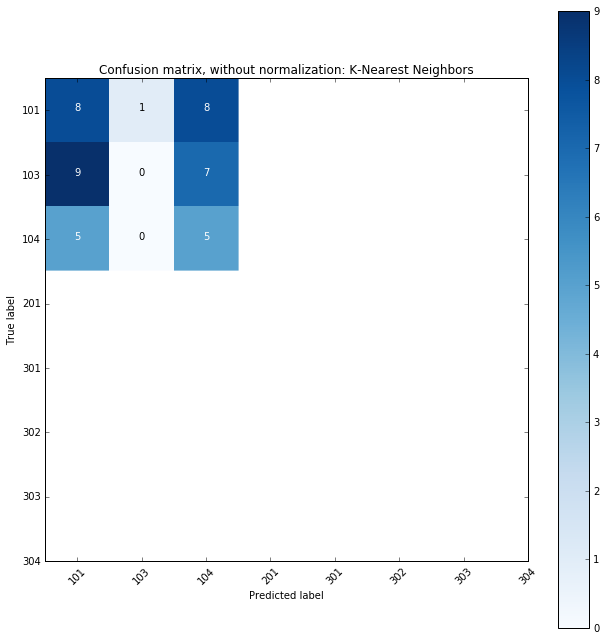

122.0
Selected number of features: 88
Train set size after feature selection:  (3116, 88)
Test set size after feature selection:  (253, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.27737   0.66667   0.39175        57
      104.0    0.00000   0.00000   0.00000         6
      201.0    0.00000   0.00000   0.00000         3
      301.0    0.59524   0.19531   0.29412       128
      302.0    1.00000   0.09091   0.16667        11
      303.0    0.16667   0.06977   0.09836        43
      304.0    0.00000   0.00000   0.00000         5

avg / total    0.43544   0.26482   0.26103       253


Confusion matrix


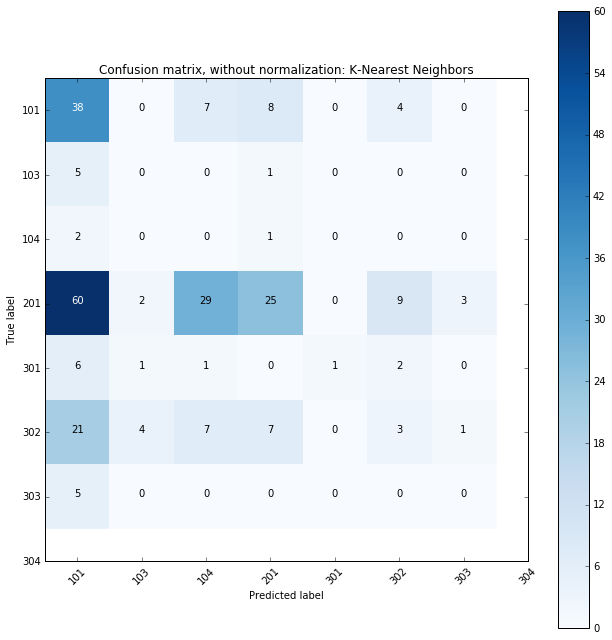

115.0
Selected number of features: 88
Train set size after feature selection:  (3218, 88)
Test set size after feature selection:  (151, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.42857   0.85714   0.57143        42
      103.0    0.00000   0.00000   0.00000         7
      104.0    0.00000   0.00000   0.00000         7
      201.0    0.06667   0.05556   0.06061        18
      301.0    0.31818   0.32558   0.32184        43
      302.0    0.00000   0.00000   0.00000         9
      303.0    0.00000   0.00000   0.00000        15
      304.0    0.00000   0.00000   0.00000        10

avg / total    0.21776   0.33775   0.25781       151


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


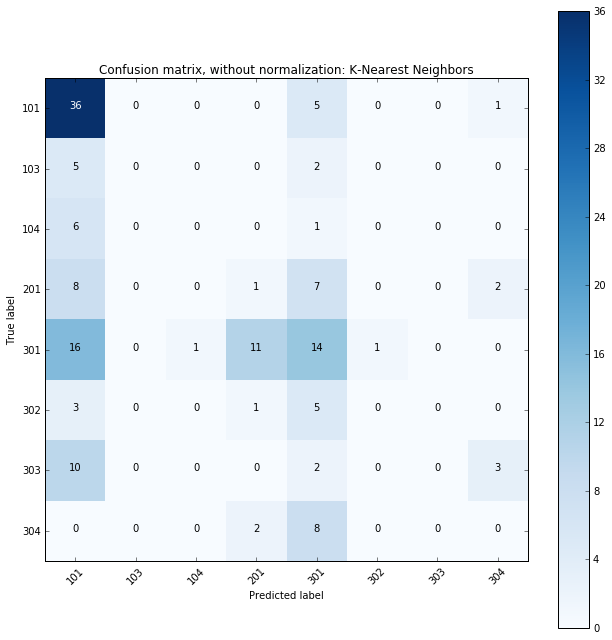

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


104.0
Selected number of features: 88
Train set size after feature selection:  (3264, 88)
Test set size after feature selection:  (105, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.56944   1.00000   0.72566        41
      103.0    0.00000   0.00000   0.00000         7
      104.0    0.00000   0.00000   0.00000         3
      201.0    0.20000   0.40000   0.26667         5
      301.0    0.80000   0.27586   0.41026        29
      302.0    1.00000   0.83333   0.90909        12
      303.0    0.00000   0.00000   0.00000         8
      304.0    0.00000   0.00000   0.00000         0

avg / total    0.56712   0.58095   0.51326       105


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


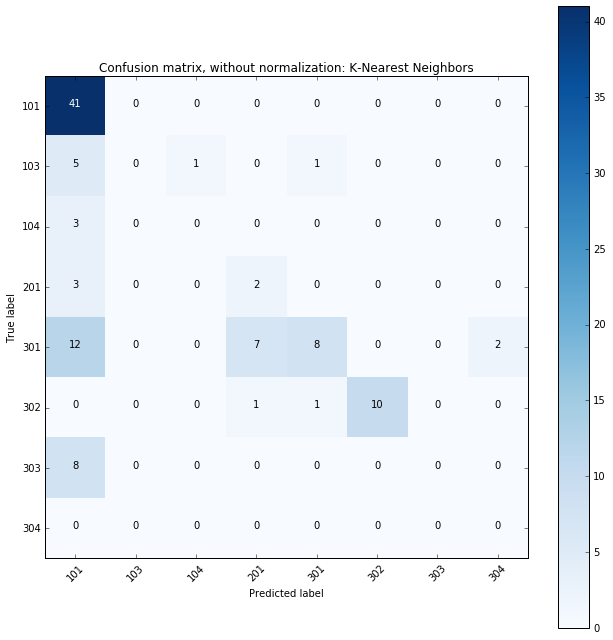

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


111.0
Selected number of features: 88
Train set size after feature selection:  (3258, 88)
Test set size after feature selection:  (111, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.32877   0.66667   0.44037        36
      103.0    0.00000   0.00000   0.00000         2
      104.0    0.00000   0.00000   0.00000        17
      201.0    0.11111   0.04762   0.06667        21
      301.0    0.14286   0.25000   0.18182        12
      302.0    0.00000   0.00000   0.00000        10
      303.0    0.00000   0.00000   0.00000         2
      304.0    0.00000   0.00000   0.00000        11

avg / total    0.14309   0.25225   0.17509       111


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


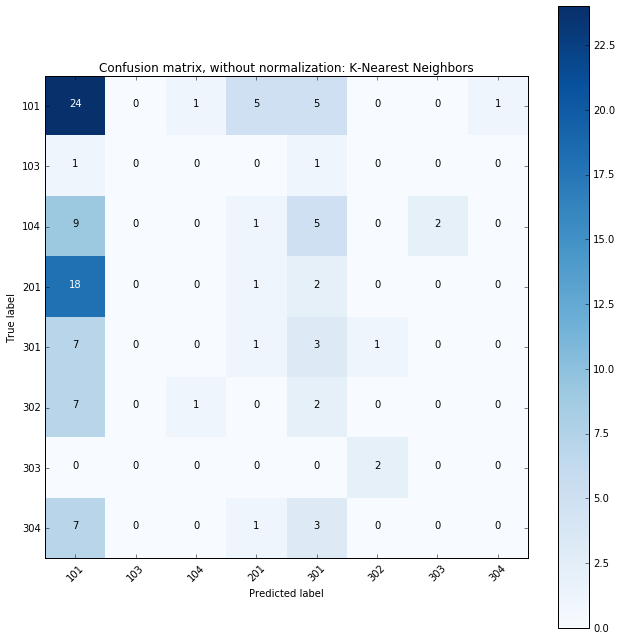

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


107.0
Selected number of features: 88
Train set size after feature selection:  (3225, 88)
Test set size after feature selection:  (144, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.40816   0.95238   0.57143        21
      104.0    0.00000   0.00000   0.00000        11
      201.0    0.25000   0.12903   0.17021        31
      301.0    0.45070   0.68085   0.54237        47
      302.0    1.00000   0.14286   0.25000         7
      303.0    0.50000   0.20000   0.28571        10
      304.0    1.00000   0.11765   0.21053        17

avg / total    0.46184   0.42361   0.35385       144


Confusion matrix


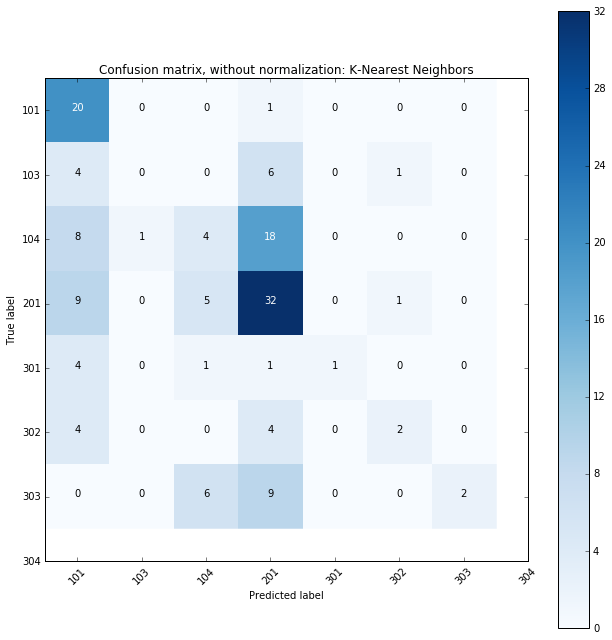

112.0
Selected number of features: 88
Train set size after feature selection:  (3236, 88)
Test set size after feature selection:  (133, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.41176   0.77778   0.53846        27
      103.0    1.00000   0.11111   0.20000         9
      104.0    0.00000   0.00000   0.00000        11
      201.0    0.66667   0.15385   0.25000        13
      301.0    0.41667   0.63830   0.50420        47
      302.0    1.00000   0.50000   0.66667         4
      303.0    0.00000   0.00000   0.00000         7
      304.0    1.00000   0.06667   0.12500        15

avg / total    0.50652   0.42857   0.35961       133


Confusion matrix


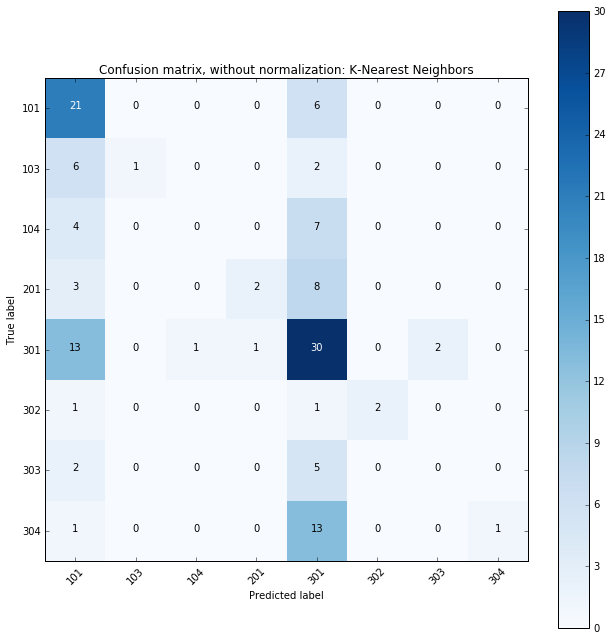

102.0
Selected number of features: 88
Train set size after feature selection:  (3143, 88)
Test set size after feature selection:  (226, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.68148   0.76033   0.71875       121
      103.0    0.00000   0.00000   0.00000         8
      104.0    0.00000   0.00000   0.00000         3
      201.0    0.20690   0.18750   0.19672        32
      301.0    0.11765   0.25000   0.16000        16
      302.0    1.00000   0.70588   0.82759        17
      303.0    0.00000   0.00000   0.00000        13
      304.0    0.00000   0.00000   0.00000        16

avg / total    0.47771   0.50442   0.48625       226


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


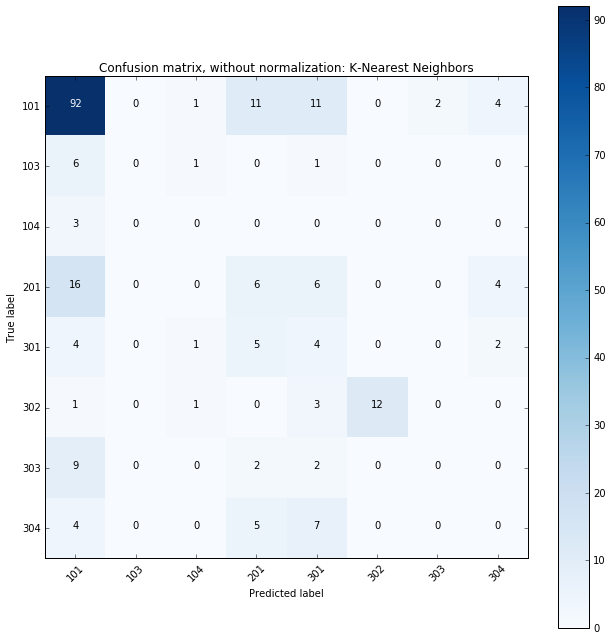

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


118.0
Selected number of features: 88
Train set size after feature selection:  (3242, 88)
Test set size after feature selection:  (127, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.63380   0.95745   0.76271        47
      103.0    0.00000   0.00000   0.00000        10
      104.0    0.33333   0.09091   0.14286        11
      201.0    0.00000   0.00000   0.00000         8
      301.0    0.28000   0.56000   0.37333        25
      302.0    1.00000   0.16667   0.28571         6
      303.0    1.00000   0.08333   0.15385        12
      304.0    0.00000   0.00000   0.00000         8

avg / total    0.46028   0.48819   0.39616       127


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


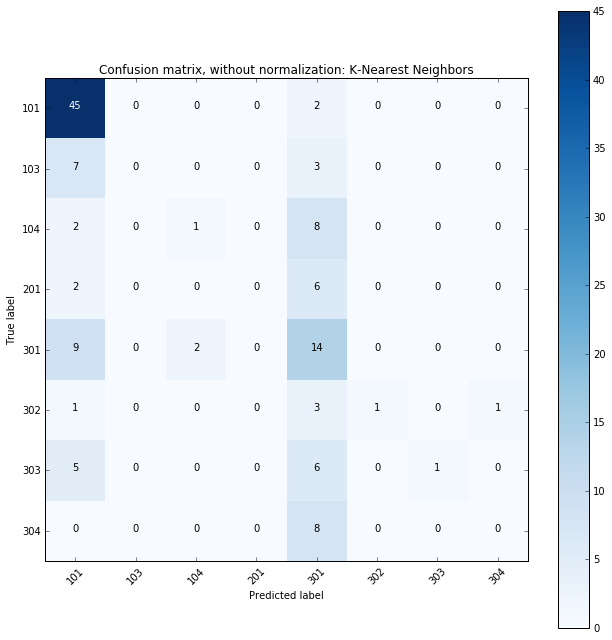

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


110.0
Selected number of features: 88
Train set size after feature selection:  (3277, 88)
Test set size after feature selection:  (92, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.57377   0.76087   0.65421        46
      103.0    0.00000   0.00000   0.00000         4
      104.0    1.00000   0.14286   0.25000         7
      201.0    0.35714   0.35714   0.35714        14
      301.0    0.06667   0.10000   0.08000        10
      302.0    0.00000   0.00000   0.00000         3
      303.0    0.00000   0.00000   0.00000         0
      304.0    0.00000   0.00000   0.00000         8

avg / total    0.42457   0.45652   0.40917        92


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


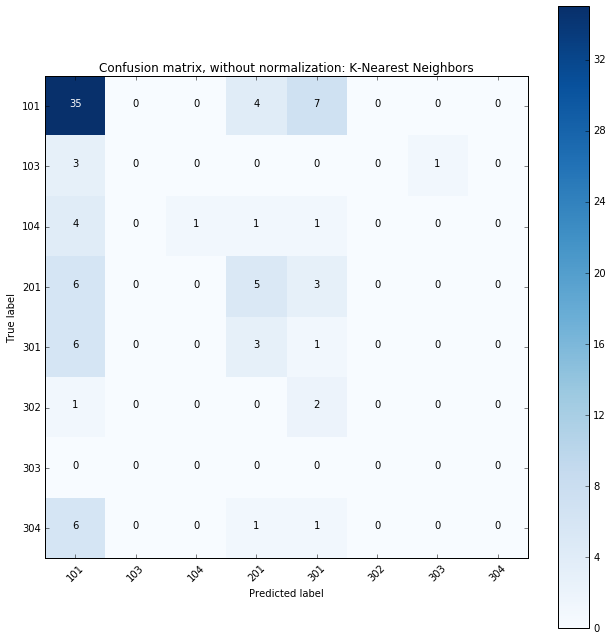

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


103.0
Selected number of features: 88
Train set size after feature selection:  (3176, 88)
Test set size after feature selection:  (193, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.25385   0.80488   0.38596        41
      103.0    0.00000   0.00000   0.00000         6
      104.0    0.16667   0.11111   0.13333         9
      201.0    0.14815   0.09756   0.11765        41
      301.0    0.30435   0.15217   0.20290        46
      302.0    0.00000   0.00000   0.00000         9
      303.0    0.00000   0.00000   0.00000        25
      304.0    0.00000   0.00000   0.00000        16

avg / total    0.16571   0.23316   0.16156       193


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


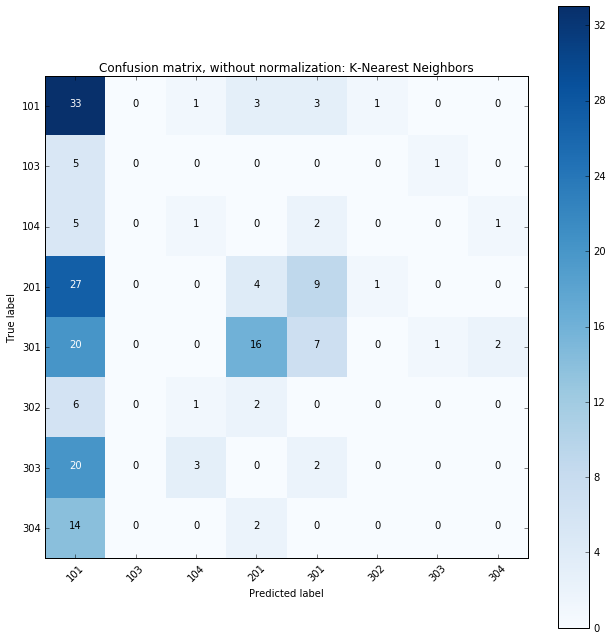

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


105.0
Selected number of features: 88
Train set size after feature selection:  (3184, 88)
Test set size after feature selection:  (185, 88)


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.48246   0.78571   0.59783        70
      103.0    0.00000   0.00000   0.00000         1
      104.0    0.33333   0.06667   0.11111        15
      201.0    0.50000   0.14634   0.22642        41
      301.0    0.13514   0.31250   0.18868        16
      302.0    1.00000   0.60870   0.75676        23
      303.0    0.66667   0.12500   0.21053        16
      304.0    0.00000   0.00000   0.00000         3

avg / total    0.51406   0.44865   0.41400       185


Confusion matrix


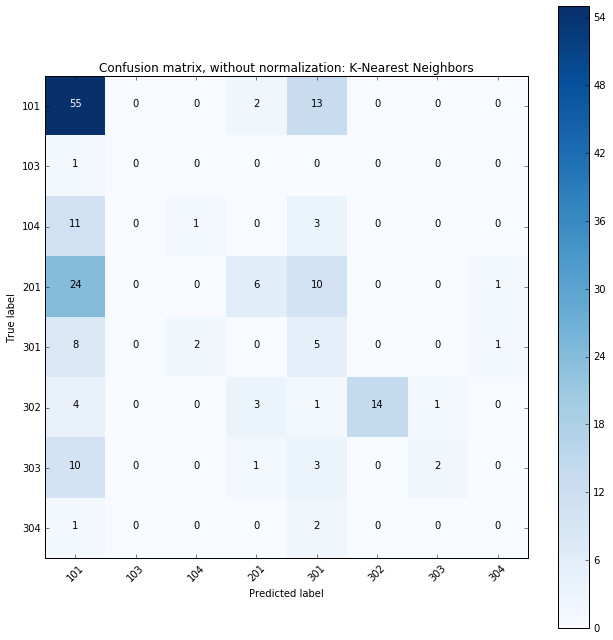

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


109.0
Selected number of features: 88
Train set size after feature selection:  (3226, 88)
Test set size after feature selection:  (143, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.61364   0.81818   0.70130        66
      103.0    0.00000   0.00000   0.00000         3
      104.0    0.00000   0.00000   0.00000         4
      201.0    0.12500   0.03704   0.05714        27
      301.0    0.18519   0.25000   0.21277        20
      302.0    0.66667   0.33333   0.44444         6
      303.0    0.15385   0.15385   0.15385        13
      304.0    0.00000   0.00000   0.00000         4

avg / total    0.37468   0.44755   0.39686       143


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


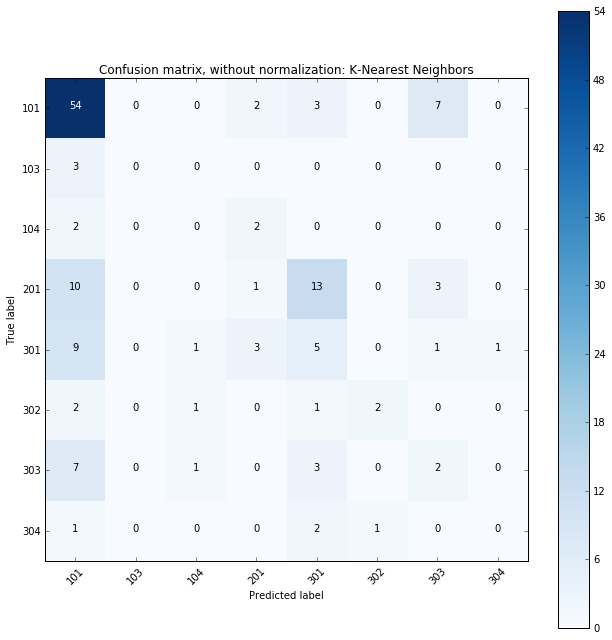

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


117.0
Selected number of features: 88
Train set size after feature selection:  (3305, 88)
Test set size after feature selection:  (64, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.48485   0.94118   0.64000        17
      103.0    0.00000   0.00000   0.00000         0
      104.0    0.00000   0.00000   0.00000         9
      201.0    0.50000   0.22222   0.30769         9
      301.0    0.40000   0.80000   0.53333        10
      303.0    0.50000   0.06667   0.11765        15
      304.0    0.25000   0.25000   0.25000         4

avg / total    0.39441   0.43750   0.33980        64


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


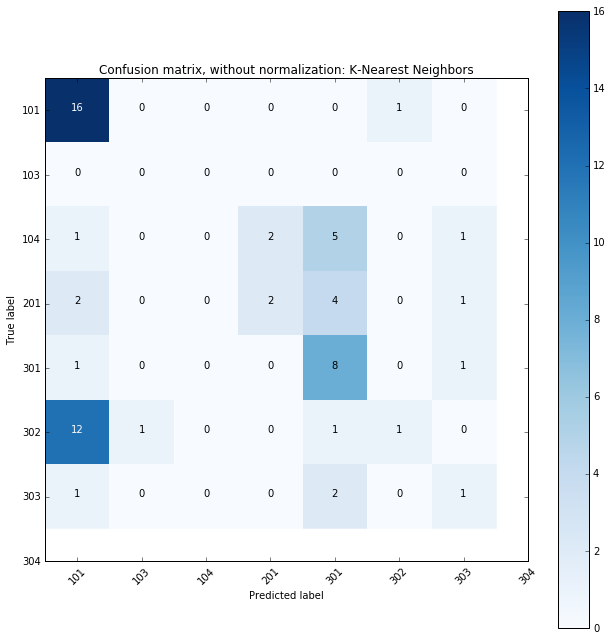

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


108.0
Selected number of features: 88
Train set size after feature selection:  (3173, 88)
Test set size after feature selection:  (196, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.33333   0.55224   0.41573        67
      103.0    0.33333   0.08333   0.13333        12
      104.0    0.00000   0.00000   0.00000         5
      201.0    0.22222   0.09524   0.13333        21
      301.0    0.40678   0.37500   0.39024        64
      302.0    0.50000   0.12500   0.20000         8
      303.0    0.50000   0.09091   0.15385        11
      304.0    0.00000   0.00000   0.00000         8

avg / total    0.33946   0.33673   0.30878       196


Confusion matrix


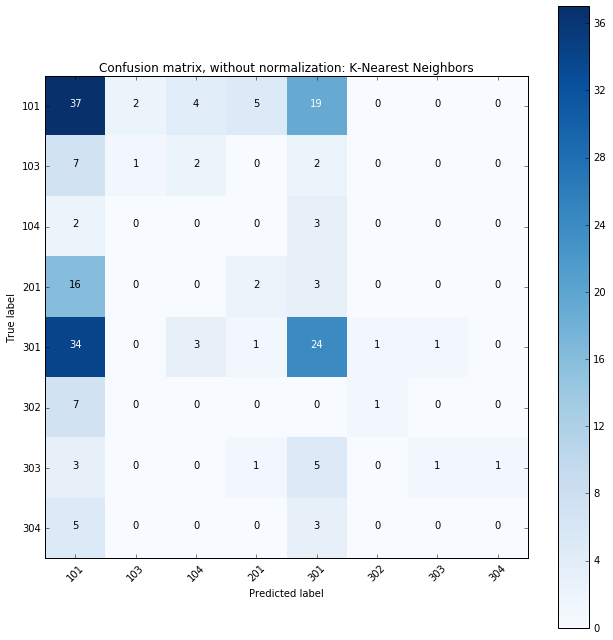

113.0
Selected number of features: 88
Train set size after feature selection:  (3232, 88)
Test set size after feature selection:  (137, 88)


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.41818   0.79310   0.54762        29
      103.0    0.00000   0.00000   0.00000         3
      104.0    0.00000   0.00000   0.00000        12
      201.0    0.44444   0.28571   0.34783        14
      301.0    0.62319   0.75439   0.68254        57
      303.0    0.00000   0.00000   0.00000        16
      304.0    0.00000   0.00000   0.00000         6

avg / total    0.39322   0.51095   0.43544       137


Confusion matrix


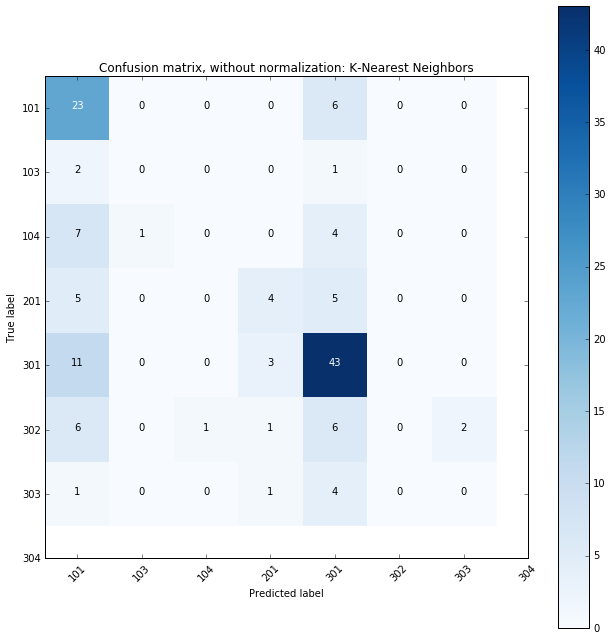

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


120.0
Selected number of features: 88
Train set size after feature selection:  (3311, 88)
Test set size after feature selection:  (58, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.86111   0.93939   0.89855        33
      103.0    1.00000   0.25000   0.40000         4
      201.0    1.00000   0.16667   0.28571         6
      301.0    0.66667   0.90909   0.76923        11
      302.0    1.00000   1.00000   1.00000         4
      303.0    0.00000   0.00000   0.00000         0

avg / total    0.85776   0.81034   0.78324        58


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


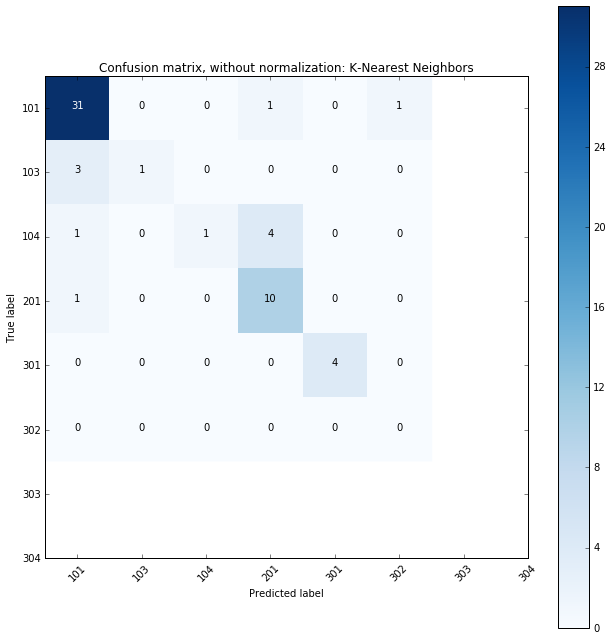

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


101.0
Selected number of features: 88
Train set size after feature selection:  (3146, 88)
Test set size after feature selection:  (223, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.75352   0.96396   0.84585       111
      103.0    0.00000   0.00000   0.00000         3
      104.0    0.00000   0.00000   0.00000        13
      201.0    0.31579   0.18750   0.23529        32
      301.0    0.17949   0.36842   0.24138        19
      302.0    1.00000   0.55556   0.71429         9
      303.0    0.00000   0.00000   0.00000         9
      304.0    0.62500   0.18519   0.28571        27

avg / total    0.55171   0.58296   0.53878       223


Confusion matrix


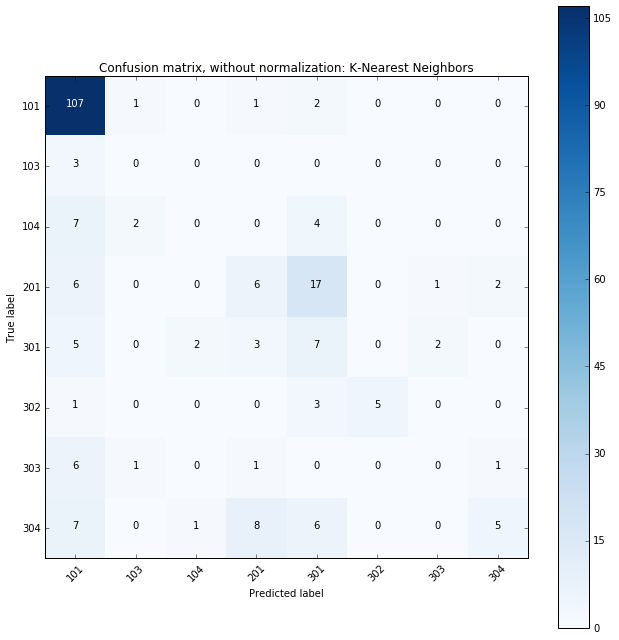

123.0
Selected number of features: 88
Train set size after feature selection:  (3304, 88)
Test set size after feature selection:  (65, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.52174   0.92308   0.66667        13
      201.0    0.46154   0.46154   0.46154        13
      301.0    0.50000   0.28571   0.36364        14
      302.0    1.00000   0.93333   0.96552        15
      303.0    1.00000   0.10000   0.18182        10
      304.0    0.00000   0.00000   0.00000         0

avg / total    0.68896   0.56923   0.55475        65


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


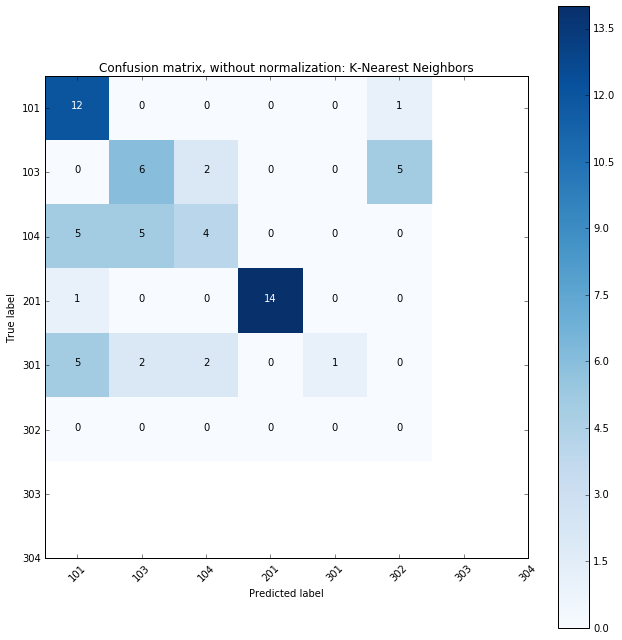

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


106.0
Selected number of features: 88
Train set size after feature selection:  (3191, 88)
Test set size after feature selection:  (178, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.50667   0.92683   0.65517        41
      103.0    0.00000   0.00000   0.00000         2
      104.0    0.00000   0.00000   0.00000         4
      201.0    0.24138   0.21875   0.22951        32
      301.0    0.54286   0.33929   0.41758        56
      302.0    1.00000   0.40000   0.57143         5
      303.0    1.00000   0.03704   0.07143        27
      304.0    0.00000   0.00000   0.00000        11

avg / total    0.51066   0.37640   0.35043       178


Confusion matrix


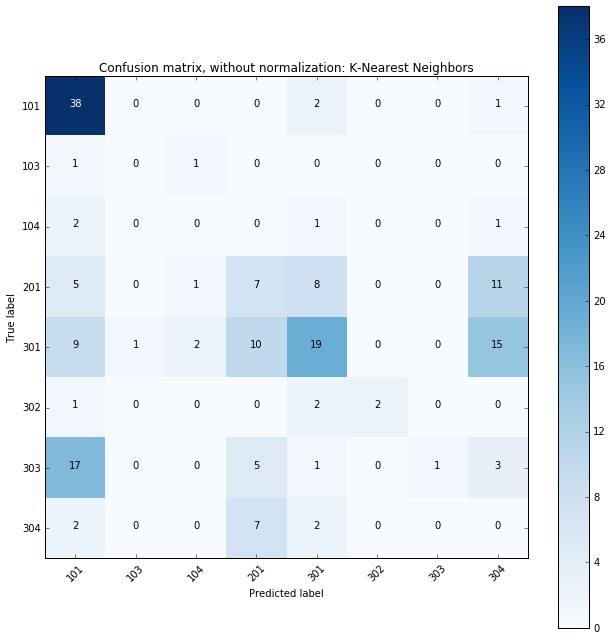

124.0
Selected number of features: 88
Train set size after feature selection:  (3285, 88)
Test set size after feature selection:  (84, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.11628   0.26316   0.16129        19
      104.0    1.00000   0.11111   0.20000        18
      201.0    0.00000   0.00000   0.00000        12
      301.0    0.00000   0.00000   0.00000         3
      302.0    0.00000   0.00000   0.00000         4
      303.0    0.00000   0.00000   0.00000        19
      304.0    0.00000   0.00000   0.00000         9

avg / total    0.24059   0.08333   0.07934        84


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


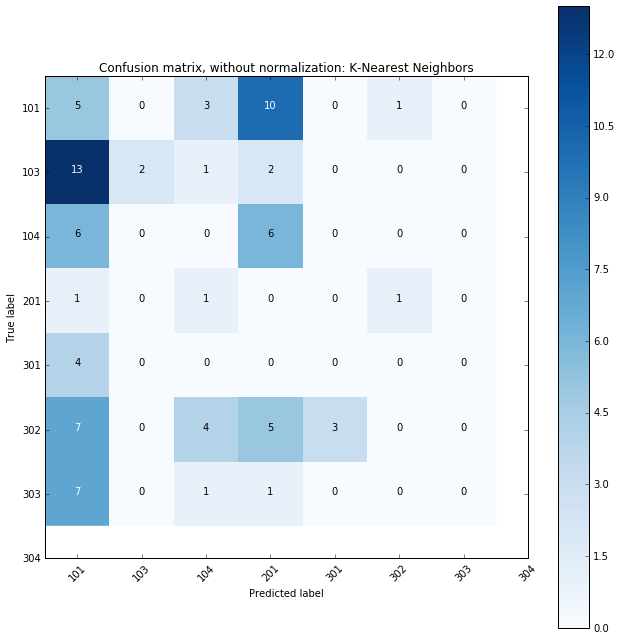

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


119.0
Selected number of features: 88
Train set size after feature selection:  (3252, 88)
Test set size after feature selection:  (117, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.36735   0.75000   0.49315        24
      103.0    0.00000   0.00000   0.00000         5
      201.0    0.00000   0.00000   0.00000        11
      301.0    0.70588   0.63158   0.66667        57
      303.0    0.50000   0.05000   0.09091        20
      304.0    0.00000   0.00000   0.00000         0

avg / total    0.50471   0.47009   0.44149       117


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


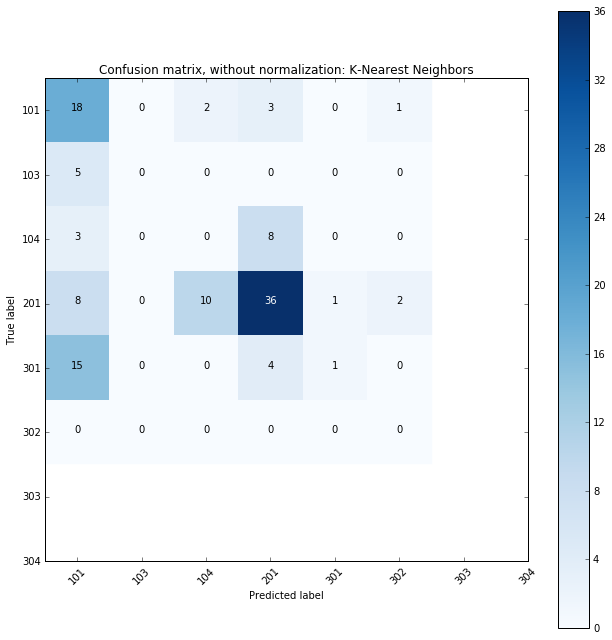

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


116.0
Selected number of features: 88
Train set size after feature selection:  (3196, 88)
Test set size after feature selection:  (173, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.90000   0.76596   0.82759        94
      104.0    0.00000   0.00000   0.00000        15
      201.0    0.41667   0.33333   0.37037        15
      301.0    0.23288   0.77273   0.35789        22
      303.0    0.00000   0.00000   0.00000        15
      304.0    0.75000   0.25000   0.37500        12

avg / total    0.60678   0.56069   0.55331       173


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


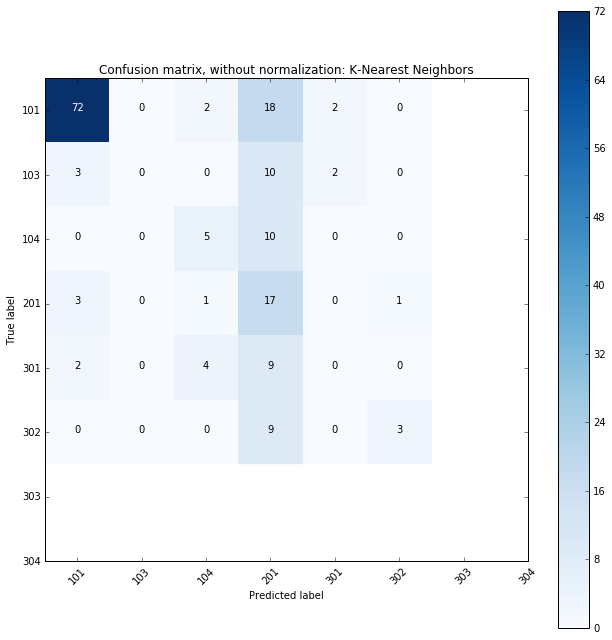

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


121.0
Selected number of features: 88
Train set size after feature selection:  (3201, 88)
Test set size after feature selection:  (168, 88)
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.49254   0.94286   0.64706        35
      103.0    0.00000   0.00000   0.00000         2
      104.0    0.00000   0.00000   0.00000         5
      201.0    0.33333   0.27778   0.30303        18
      301.0    0.79412   0.56250   0.65854        96
      302.0    1.00000   1.00000   1.00000         1
      303.0    0.33333   0.16667   0.22222         6
      304.0    0.07692   0.20000   0.11111         5

avg / total    0.61225   0.56548   0.56077       168


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


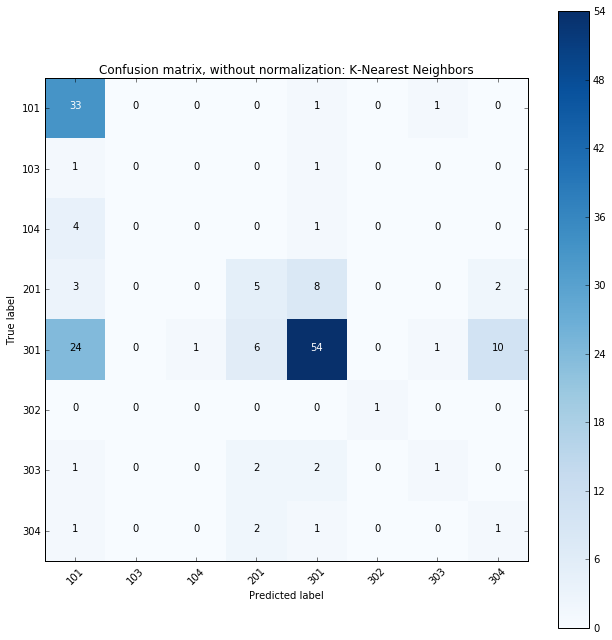

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
# a = []
print('Number of subjects: ', len(groups))

results = {}

for g in groups: 
    print(g)
    test = df.loc[(df.subject == g)]
    train = df.loc[(df.subject != g)]
    
    features = select_features(train[features], train['activity'])    
    
    X_train = train[features]
    y_train = train['activity']
    print("Train set size after feature selection: ", X_train.shape)
    
    X_test = test[features]
    y_test = test['activity']
    print("Test set size after feature selection: ", X_test.shape)    
    
    models = grid(X_train,y_train)
    
    #fitting models to test_data
    for model in models:
        res = test_classifier (model, X_train, y_train, X_test, y_test)
        if model[2] not in results:
            results[model[2]] = [[],[]]
        results[model[2]][0].append(res[0])
        results[model[2]][1].append(res[1])
    
#     a.append(run(pram,X_train,y_train,X_test,y_test))
# avg = np.array(a)
# print(np.mean(avg))    

K-Nearest Neighbors :
Average Weighted F1-score:  0.390437125393
Confusion matrix


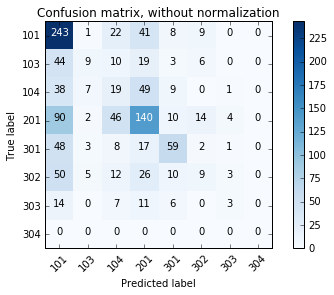

{'K-Nearest Neighbors': [0.39043712539266595, array([[243,   1,  22,  41,   8,   9,   0,   0],
       [ 44,   9,  10,  19,   3,   6,   0,   0],
       [ 38,   7,  19,  49,   9,   0,   1,   0],
       [ 90,   2,  46, 140,  10,  14,   4,   0],
       [ 48,   3,   8,  17,  59,   2,   1,   0],
       [ 50,   5,  12,  26,  10,   9,   3,   0],
       [ 14,   0,   7,  11,   6,   0,   3,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]])]}


In [15]:
results_average = {}
for key, value in results.items():
    #print("key",key)
    #print("val",value)
    results_average[key] = []
    results_average[key].append(np.mean(value[0]))
    
    conf_mat_sum = np.array([[0 for col in range(8)] for row in range(8)])
    for x in value[1]:
        #print(len(x))
        #print(len(conf_mat_sum))
        #print(conf_mat_sum)
        #print(x)
        if len(conf_mat_sum) > len(x):
            c = conf_mat_sum.copy()
            c[:x.shape[0],:x.shape[1]] +=  x
        conf_mat_sum = c
    
    results_average[key].append(conf_mat_sum)
    
    print(key,':')
    print("Average Weighted F1-score: ", results_average[key][0])
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(conf_mat_sum, classes=class_names, title='Confusion matrix, without normalization')

    plt.show()
    
    
print(results_average)